In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import logomaker

In [2]:
df = pd.read_excel('Pause sites Vvedenskaya 2014.xlsx', header=None, names=['seq'])

In [3]:
df['seq'] = [s.upper() for s in df['seq']]
df['len'] = [len(s) for s in df['seq']]
print(df['len'].unique())
df

[11]


,seq,len
0,TACCACCACCA,11
1,GGCCTTCTATA,11
2,AACCTCGGACG,11
3,AATGACACTCG,11
4,GGAAGGCCGTA,11
...,...,...
5499,AGACGCTGGCG,11
5500,GATAATCCACG,11
5501,TGTCCCCTGCG,11
5502,ACGCAATTACG,11


In [4]:
gc_content = .508
bg = [(1-gc_content)/2,gc_content/2,gc_content/2,(1-gc_content)/2]
logo_df = logomaker.alignment_to_matrix(df['seq'], background=bg, 
                                        to_type='weight', center_weights=True)

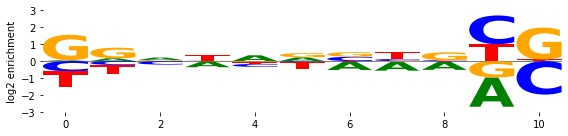

In [5]:
# Show full logo
ylim = [-3, 3]
yticks = range(-3,4)
fig, ax = plt.subplots(figsize=[8,2])

logo = logomaker.Logo(logo_df, show_spines=False, ax=ax, flip_below=False)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.set_ylabel('log2 enrichment')
fig.tight_layout()
fig.savefig('full_logo.pdf')

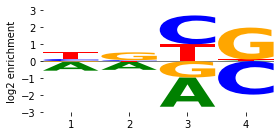

In [6]:
fig, ax = plt.subplots(figsize=[4,2])

clipped_logo = logo_df.iloc[-4:,:]
clipped_logo.index = range(1,5)
logo = logomaker.Logo(clipped_logo, show_spines=False, ax=ax, flip_below=False)
logo.style_xticks(anchor=1,spacing=1)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.set_ylabel('log2 enrichment')
fig.tight_layout()
fig.savefig('clipped_logo.pdf')